<a href="https://colab.research.google.com/github/mitkrieg/dl-assignment-1/blob/main/assignment1_practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

## Load Data using Pytorch

In [3]:
train = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:00<00:00, 38187543.54it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 13339965.79it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




100%|██████████| 4422102/4422102 [00:00<00:00, 10878725.84it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 14809517.83it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



Text(0.5, 1.0, 'Dress')

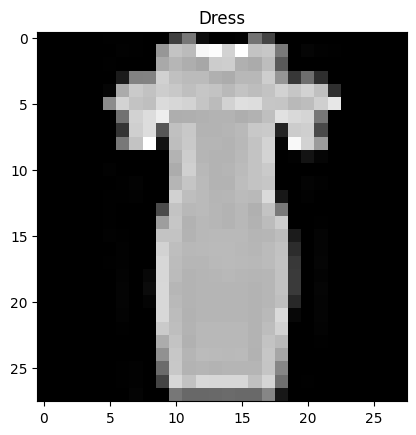

In [41]:

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
fig = plt.figure()
sample_idx = torch.randint(len(train), size=(1,)).item()
image, label = train[sample_idx]
plt.imshow(image.squeeze(), cmap='gray')
plt.title(labels_map[label])

In [35]:
batch = 64
trainloader = DataLoader(train, batch, shuffle=True, num_workers=2)

testloader = DataLoader(test, batch, shuffle=True, num_workers=2)

In [36]:
image.shape

torch.Size([1, 28, 28])

In [42]:
class Lenet5(nn.Module):
  def __init__(self, batch):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1)
    self.avg_pool1 = nn.AvgPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1)
    self.avg_pool2 = nn.AvgPool2d(2, 2)
    self.fc1 = nn.Linear(16*16, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84,10)

  def forward(self, x):
    x = F.tanh(self.conv1(x))
    x = self.avg_pool1(x)
    x = F.tanh(self.conv2(x))
    x = self.avg_pool2(x)
    x = torch.flatten(x, 1)
    x = F.tanh(self.fc1(x))
    x = F.tanh(self.fc2(x))
    x = self.fc3(x)
    return x

net = Lenet5(batch)

loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=1e-3, momentum=0.9)

In [43]:
for epoch in range(5):
  total_loss = 0
  for i, data in enumerate(trainloader):
    inputs, labels = data

    optimizer.zero_grad()
    outputs = net(inputs)
    loss = loss_function(outputs, labels)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()
    if i % 2000 == 1999:
      print(f'Epoch #{epoch + 1}, Batch #{i + 1}: {total_loss / 2000}')
      total_loss = 0


In [44]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 75 %


In [22]:
feats, lbls = next(iter(trainloader))

In [23]:
lbls

tensor([8, 4, 2, 1])

In [24]:
feats.shape

torch.Size([4, 1, 28, 28])